最近歐洲經濟疲弱，TLTRO（定向長期再融資）的預計推行，堅定歐洲央行的鴿派立場。再加上英國脫歐遲遲未定、義大利債務問題，增加歐洲經濟區的不穩定性，因此想探討近三年來歐洲經濟的情況，以歐洲貨幣型ETF做進一步的分析：
1. 分析價格走勢及市場熱絡程度（以成交量衡量）
2. 分析報酬及風險（使用歷史資料）

這裡選擇三檔ETF，分別是： FXB(Invesco英鎊指數基金) ULE(ProShares兩倍做多歐元) EUO(ProShares兩倍看空歐元ETF)

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime

start = datetime.datetime(2016, 6, 1)
end = datetime.datetime(2019, 3, 31)

today = '20190331'
tckr1 = 'FXB'
tckr2 = 'ULE'
tckr3 = 'EUO'
# ETF data
FXB = web.DataReader(tckr1, 'yahoo', start, end)
ULE = web.DataReader(tckr2, 'yahoo', start, end)
EUO = web.DataReader(tckr3, 'yahoo', start, end)

FXB.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-31,36.119999,36.119999,36.119999,36.119999,0.0,31.071228
2016-06-01,35.950001,35.950001,35.950001,35.950001,0.0,30.924992
2016-06-02,35.939999,35.939999,35.939999,35.939999,0.0,30.916388
2016-06-03,36.209999,36.209999,36.209999,36.209999,0.0,31.148647
2016-06-06,36.290001,36.290001,36.290001,36.290001,0.0,31.217466


In [2]:
# calculate monthly return & risk
def risk_return(df):
    data_group = df.groupby(df.index.strftime('%Y %m'))['Close']
    mon_risk = data_group.std()
    mon_return = data_group.pct_change().asfreq('BM')  #asfreq('BM'):從月初到月終
    return mon_risk, mon_return

# calculate monthly average risk & return
def avg(risk, ret):
    avg_risk = risk.mean()
    avg_ret = ret.mean()
    return avg_risk, avg_ret

FXB_avg = avg(risk_return(FXB)[0], risk_return(FXB)[1])
ULE_avg = avg(risk_return(ULE)[0], risk_return(ULE)[1])
EUO_avg = avg(risk_return(EUO)[0], risk_return(EUO)[1])


date = sorted(set(FXB.index.strftime('%Y-%m')))
date_time = []
for dat in date:
    arrange = datetime.datetime.strptime(dat, '%Y-%m')
    date_time.append(arrange)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


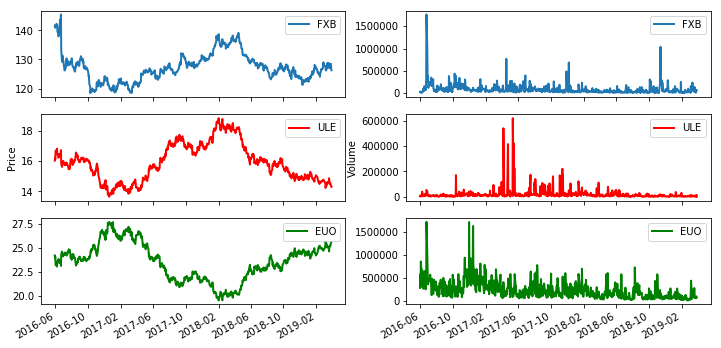

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(321)
ax2 = plt.subplot(323)
ax3 = plt.subplot(325)
ax4 = plt.subplot(322)
ax5 = plt.subplot(324)
ax6 = plt.subplot(326)
ax1.plot(FXB.index, FXB['Close'], linewidth = 2.0, label = "FXB")
ax2.plot(ULE.index, ULE['Close'], color = 'red', linewidth = 2.0, label = "ULE")
ax3.plot(EUO.index, EUO['Close'], color = 'green', linewidth = 2.0, label = "EUO")
ax4.plot(FXB.index, FXB['Volume'], linewidth = 2.0, label = 'FXB')
ax5.plot(ULE.index, ULE['Volume'], color = 'red', linewidth = 2.0, label = 'ULE')
ax6.plot(EUO.index, EUO['Volume'], color = 'green', linewidth = 2.0, label = 'EUO' )
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")
ax6.legend(loc="upper right")
ax2.set_ylabel("Price")
ax5.set_ylabel("Volume")

# date format
monthFmt = mdates.DateFormatter('%Y-%m')
ax3.xaxis.set_major_formatter(monthFmt)

# Rotate date labels automatically
fig.autofmt_xdate()

以上兩組圖（左：價格走勢；右：成交量）可以看出2016/6月英國脫歐公投使英鎊(FXB)大貶，連帶影響做多歐元(ULE)的向下走勢，而與這兩檔ETF反向操作的EUO，價格則上揚，粗略推斷身為歐盟重要會員國、世界第五大經濟體的英國，一舉一動也牽動著整個歐元區的經濟，所以為了簡化，以下將以英國脫歐的動向作為判讀依據。

近三年來英鎊及看多歐元的走勢如下：2016/6~2017/3持續半年的貶值，2017/3~2018/4、5緩慢回升後一路下貶至今，參考脫歐時間軸，直到2017/2英國政府才正式公佈脫歐計畫，而後持續了長達一年左右的談判，到2018/3/19達成第一階段共識，這期間FXB及ULE止貶回升，然而在此之後脫歐計畫出現意見分歧，時至今日仍未能達成共識，市場對英國政治的不確定性正反映在持續下跌的FXB、ULE上。

以下將針對這三檔ETF的風險及報酬做更進一步的分析：

FXB average risk:  1.3190782827413323
ULE average risk:  0.2521925981334193
EUO average risk:  0.3771050777299332


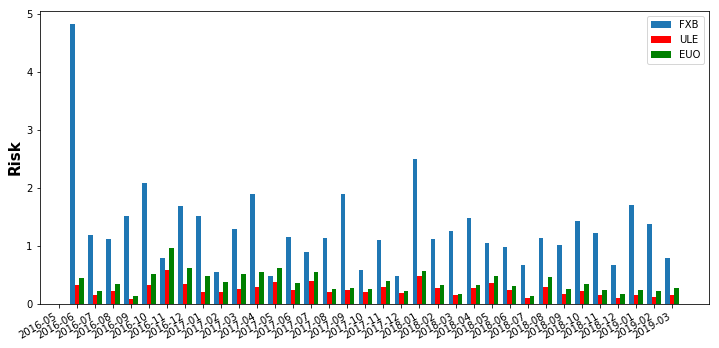

In [4]:
fig = plt.figure(figsize = (12, 6))
barWidth = 0.25

r1 = np.arange(len(date))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, risk_return(FXB)[0], width = barWidth, label = 'FXB')
plt.bar(r2, risk_return(ULE)[0], color = 'red', width = barWidth, label = 'ULE')
plt.bar(r3, risk_return(EUO)[0], color = 'green', width = barWidth, label = 'EUO')

plt.ylabel('Risk', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(date))], date) #use date (str) instead of date_time(datetime object)
plt.legend()

# Rotate date labels automatically
fig.autofmt_xdate()

print('FXB average risk: ', FXB_avg[0])
print('ULE average risk: ', ULE_avg[0])
print('EUO average risk: ', EUO_avg[0])

從上圖可知，就英鎊ETF、歐元做多ETF和看空歐元ETF的風險而言，以深受脫歐議題所擾的英國，其貨幣ETF風險最大，是其他兩檔ETF的4~5倍；而平均而言，看空歐元高於做多的風險，且兩者在統計上有顯著差異（見下方解釋）。

以下針對做多歐元(ULE)和看空歐元(EUO)兩者風險是否有顯著差異做檢定，假設兩者為獨立樣本，在使用Student's t-test之前，須先檢定兩者變異數的同質性：

虛無假設：σ(ULE) = σ(EUO)
選定顯著水準：α = 5%
檢定統計量： F = var_EUO / var_ULE
拒絕域：{ F> F α = 5%(34, 34) = 1.77207}
結果：拒絕虛無假設，故兩者為異質變異數，須改用Welch's t-test

虛無假設：μ(ULE) = μ(EUO)
選定顯著水準：α = 5%
檢定統計量： t = (EUO_mean - ULE_mean) / √(var_EUO / a + var_ULE / b)
拒絕域：{ |T|> T α = 5%(df) = 1.67303}
結果：拒絕虛無假設，故兩者均數有顯著差異

In [5]:
import math

ULE_list = []
for data in risk_return(ULE)[0]:
    if math.isnan(data) == True:
        pass
    else:
        ULE_list.append(data)

EUO_list = []
for data in risk_return(EUO)[0]:
    if math.isnan(data) == True:
        pass
    else:
        EUO_list.append(data)

In [6]:
from scipy import stats

a = len(EUO_list)
b = len(ULE_list)
var_ULE = np.var(ULE_list)
var_EUO = np.var(EUO_list)
F_value = var_EUO / var_ULE # F(34, 34), (α = 5%) = 1.77207
print(F_value > 1.77207) # Reject H0: population var of ULE and EUO is the same >> welch's t-test

df = int((var_EUO / a + var_ULE / b) **2 / (1/(a-1) * (var_EUO / a) **2 + 1/(b-1) * (var_ULE / b) **2 )) 
t = (EUO_avg[0] - ULE_avg[0]) / math.sqrt(var_EUO / a + var_ULE / b) # t(55), (α = 5%) = 1.67303 
print(t > 1.67303) # Reject H0

True
True


FXB average return:  0.0012970909441006636
ULE average return:  0.001668656526456428
EUO average return:  -0.001572687469406386


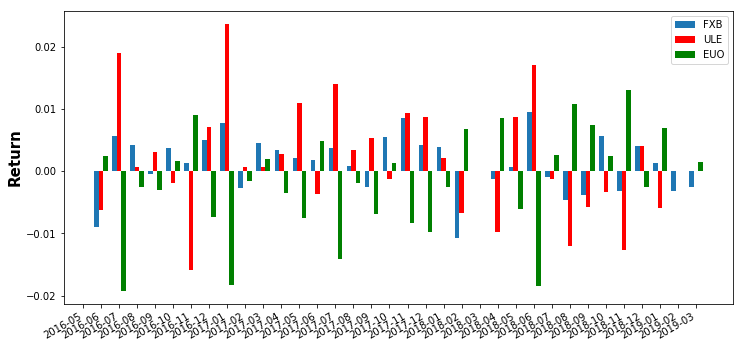

In [7]:
fig = plt.figure(figsize = (12, 6))
barWidth = 0.25

r1 = np.arange(len(date))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, risk_return(FXB)[1], width = barWidth, label = 'FXB')
plt.bar(r2, risk_return(ULE)[1], color = 'red', width = barWidth, label = 'ULE')
plt.bar(r3, risk_return(EUO)[1], color = 'green', width = barWidth, label = 'EUO')

plt.ylabel('Return', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(date))], date) #use date (str) instead of date_time(datetime object)
plt.legend()

# Rotate date labels automatically
fig.autofmt_xdate()

print('FXB average return: ', FXB_avg[1])
print('ULE average return: ', ULE_avg[1])
print('EUO average return: ', EUO_avg[1])

＃2018-03-31 剛好是假日所以沒有資料，使用asfreq('BM')會回傳NaN

三年下來三檔ETF的報酬有正有負，平均報酬皆近似於0，不適合長期持有；然而若是進行短線操作，仍有獲利機會，2016/6 ~ 2019/3三十四個月之中，FXB有18個月的報酬超過三年的平均報酬，ULE有15個月，EUO則有17個月，其中FXB獲利機會最大(18>17>15)，而上圖圖表顯示，ULE一旦獲利，將獲得較高的報酬(ULE長條正的值較大)。

In [8]:
def ab_return(datalist, average):
    cnt = 0
    for data in datalist:
        if data >= average:
            cnt += 1
    return cnt

F_abreturn = ab_return(risk_return(FXB)[1], FXB_avg[1])
U_abreturn = ab_return(risk_return(ULE)[1], ULE_avg[1])
E_abreturn = ab_return(risk_return(EUO)[1], EUO_avg[1])

print(F_abreturn, U_abreturn, E_abreturn)

18 15 17


接著透過BBC的網站分析新聞對ETF交易成交量和價格的影響

In [9]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import ssl
import datetime

In [10]:
driver = webdriver.Chrome("/Library/Frameworks/Python.framework/Versions/3.6/chromedriver")
#driver.get("https://www.bbc.com/news/topics/cwlw3xz0lvvt/brexit")
driver.get("https://www.bbc.co.uk/search?q=Brexit")


more_path = '//*[@id = "search-content"]/nav[1]/a' # find click button path
context = ssl._create_unverified_context()


for i in range(35):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    driver.find_element_by_xpath(more_path).click()
    driver.implicitly_wait(5)
pageSource = driver.page_source
bsObj = BeautifulSoup(pageSource)

In [11]:
try:
    articles_v = bsObj.find_all("article", {"class" : "has_image media-video"})
    articles_t = bsObj.find_all("article", {"class" : "has_image media-text"})
except:
    pass

def process_data(obj):
    news_list = []
    for news in obj:
        try:
            date = news.find('time')['datetime'][:10]
            title = news.find("h1", {"itemprop" : "headline"}).get_text()
            summary = news.find("p", {"class" : "summary long"}).get_text()
            news_list.append({
                'date' : date,
                'title' : title,
                'summary' : summary})
        except:
            pass
    return news_list

videos = process_data(articles_v)
texts = process_data(articles_t)

if len(texts) != 0:
    for adict in texts:
        videos.append(adict)
print(len(videos))

277


In [12]:
# 每日新聞數量
start = datetime.datetime(2018, 5, 1)
end = datetime.datetime.today()
step = datetime.timedelta(days=1)


timeSeries = {}
while start < end:
    timeSeries[start.strftime('%Y-%m-%d')] = 0
    start += step
#print(timeSeries)

for news in videos:
    if news['date'] in timeSeries:
        timeSeries[news['date']] += 1
#print(timeSeries)

In [13]:
import pandas as pd
pd.DataFrame(videos)[['date', 'title', 'summary']].head()

,date,title,summary
0,2019-04-09,Spotlight: Brexit Drama,… that will determine the fate of Brexit.\n\nP...
1,2018-05-26,The Brexit Lectures: Series 1: Nick Clegg on B...,"… a lecture on the future of Brexit, from Mond..."
2,2018-05-05,The Brexit Lectures: Series 1: Liam Fox on Brexit,"… of Brexit, from Monday 30 April.…"
3,2019-04-30,Welsh Assembly: Brexit Statement,…Brexit Minister Jeremy Miles making a stateme...
4,2019-04-12,Brexit Party Campaign Launch,…Leader of the Brexit Party Nigel Farage MEP l...


<Figure size 864x432 with 0 Axes>

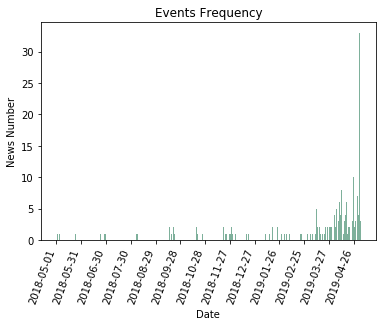

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def barplot(x, y,x_label="", y_label="", title=""): 
    _, ax = plt.subplots()
    
    ax.bar(x,y, color="#7EB09B", align = 'center')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')


fig = plt.figure(figsize = (12, 6))
barplot(timeSeries.keys(), timeSeries.values(), x_label = 'Date', y_label = 'News Number', title = 'Events Frequency')

由上圖可發現2019年的新聞佔了絕大多數(247/300)，判斷可能因為即時性而被網站篩選掉，為避免分析因此產生偏頗，所以接下來會針對2019年後的資料進行短期分析。

<Figure size 864x432 with 0 Axes>

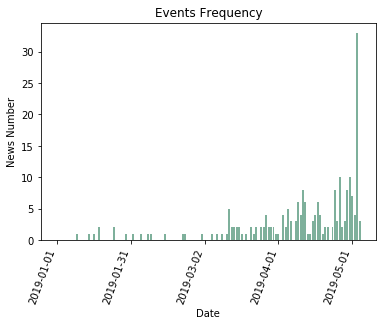

In [15]:
#短期分析：只針對2019年的新聞
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime.today()
step = datetime.timedelta(days=1)


timeSeries = {}
while start < end:
    timeSeries[start.strftime('%Y-%m-%d')] = 0
    start += step
#print(timeSeries)

for news in videos:
    if news['date'] in timeSeries:
        timeSeries[news['date']] += 1
#print(timeSeries)

fig = plt.figure(figsize = (12, 6))
barplot(timeSeries.keys(), timeSeries.values(), x_label = 'Date', y_label = 'News Number', title = 'Events Frequency')